In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

csv_path = "../DATA/train.csv"
df = pd.read_csv(csv_path)

In [24]:
def evaluate_snr_catalog (df):
    # Required columns in this file: "SNR" (estimated) and "stack_snr"
    x_col = "SNR"
    y_col = "stack_snr"

    # Clean
    d = df[[x_col, y_col, "physical_filter", "trail_length", "stack_detection"]].copy()
    d = d[d["stack_detection"]==True]
    d = d.replace([np.inf, -np.inf], np.nan).dropna(subset=[x_col, y_col])
    d = d[(d[x_col] > 0) & (d[y_col] > 0)]  # SNRs should be positive

    x = d[x_col].to_numpy()
    y = d[y_col].to_numpy()

    good_filter = (y<15) & (x>5)
    x = x[good_filter]
    y = y[good_filter]



    xmin, xmax = np.percentile(x, [0.5, 99.5])
    ymin, ymax = np.percentile(y, [0.5, 99.5])

    # Fit y = a*x + b
    #a, b = np.polyfit(x, y, deg=1)
    a = np.sum(x * y) / np.sum(x * x)
    b = 0
    plt.figure(figsize=(7, 6))
    hb = plt.hexbin(x, y, gridsize=70, mincnt=1)
    plt.colorbar(hb, label="count")

    xx = np.linspace(xmin, xmax, 200)
    plt.plot(xx, xx, linewidth=2, label="y=x")
    plt.plot(xx, a*xx + b, linewidth=2, label=f"fit: y={a:.3f}x")

    plt.xlim(xmin, xmax)
    plt.ylim(xmin, xmax)
    plt.xlabel("Estimated SNR (SNR)")
    plt.ylabel("stack_snr")
    plt.title("stack_snr vs estimated SNR")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    res = y - x

    fig = plt.figure(figsize=(7, 5))
    plt.scatter(x, res, s=6, alpha=0.3)
    plt.axhline(0.0, linewidth=2)
    plt.xlabel("Estimated SNR (SNR)")
    plt.ylabel("Residual (stack_snr - SNR)")
    plt.title("Residuals vs estimated SNR")
    plt.grid(True, alpha=0.3)
    plt.show()

    L = d["trail_length"].to_numpy()[good_filter]
    ratio = y / x

    plt.figure(figsize=(7, 5))
    plt.scatter(L, res, s=6, alpha=0.3)
    plt.axhline(0.0, linewidth=2)
    plt.xlabel("trail_length [px]")
    plt.ylabel("Residual (stack_snr - SNR)")
    plt.title("Residuals vs trail length")
    plt.ylim(np.percentile(res, 0.5), np.percentile(res, 99.5))
    plt.grid(True, alpha=0.3)
    plt.show()

    plt.figure(figsize=(7, 4))
    plt.hist(res, bins=80)
    plt.xlabel("Residual (stack_snr - SNR)")
    plt.ylabel("count")
    plt.title("Residual distribution")
    plt.grid(True, alpha=0.3)
    plt.show()

    plt.figure(figsize=(7, 4))
    plt.hist(x, bins=80, histtype="step", label="estimated")
    plt.hist(y, bins=80, histtype="step", label="stack")
    plt.xlabel("SNR")
    plt.ylabel("count")
    plt.title("SNR distribution")
    plt.legend()
    plt.show()

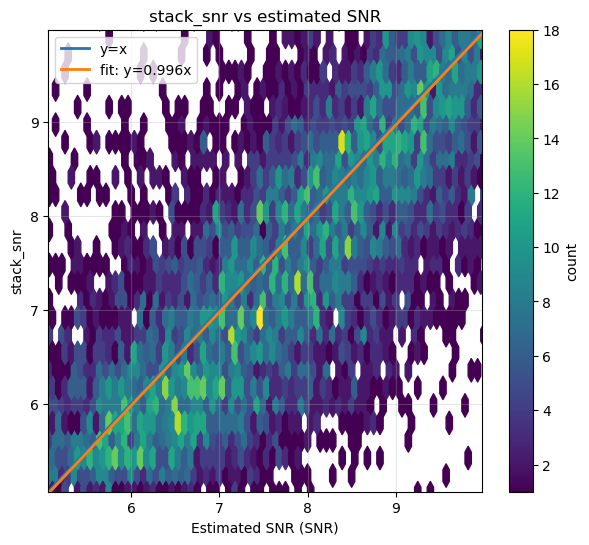

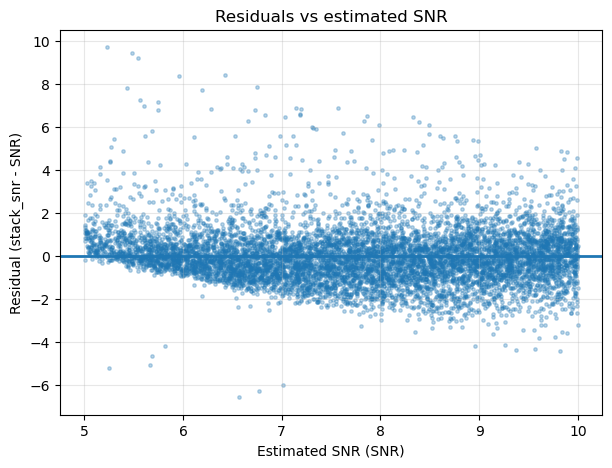

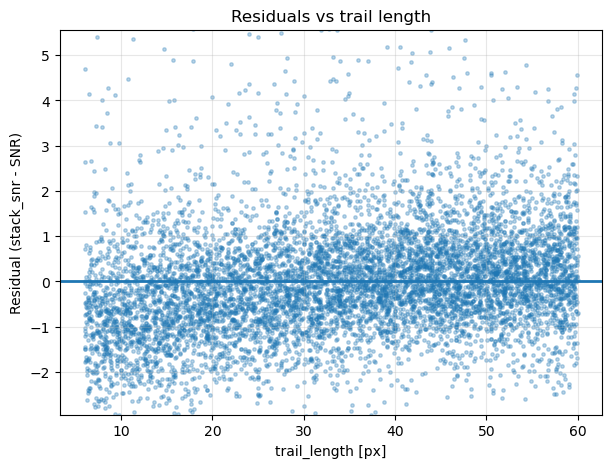

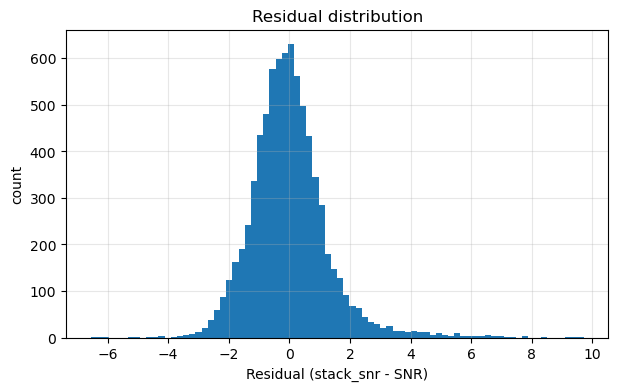

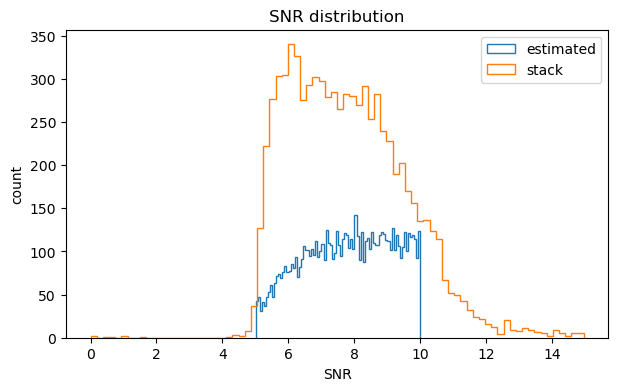

In [25]:
evaluate_snr_catalog(df)